In [1]:
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [2]:
mpFaceDetection = mp.solutions.face_detection
faceDetection = mpFaceDetection.FaceDetection(model_selection=1)

In [7]:
def load_video(path: str) -> list[float]:
    mpFaceDetection = mp.solutions.face_detection
    faceDetection = mpFaceDetection.FaceDetection(model_selection=1)
    cap = cv2.VideoCapture(path)
    frames = []
    offy = 20
    offx = 35
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        success, frame = cap.read()
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = faceDetection.process(frame)
        if results.detections:
            for lips in results.detections:
                landmarks = lips.location_data.relative_keypoints
                mouth = (int(landmarks[3].x * frame.shape[1]), int(landmarks[3].y * frame.shape[0]))
                mouth = np.array(mouth)
                x = mouth[0]
                y = mouth[1]
        frames.append(frame[y - offy:y + offy,x - offx:x + offx :])
        
    cap.release()
    return frames
    

In [14]:
frames=load_video("Data/s1/bbaf2n.mpg")
print("Total # of frames in a video: ", len(frames))
print("Shape of each frame: ", frames[1].shape)
print(frames)

Total # of frames in a video:  75
Shape of each frame:  (40, 70, 3)
[array([[[221, 160, 124],
        [219, 158, 122],
        [215, 149, 115],
        ...,
        [214, 170, 103],
        [210, 171, 102],
        [209, 170, 101]],

       [[220, 159, 123],
        [218, 157, 121],
        [215, 152, 117],
        ...,
        [210, 169, 101],
        [209, 169, 103],
        [208, 168, 102]],

       [[220, 159, 123],
        [218, 157, 121],
        [215, 152, 117],
        ...,
        [210, 169, 101],
        [208, 168, 102],
        [208, 168, 102]],

       ...,

       [[191, 150, 103],
        [192, 151, 104],
        [193, 148, 102],
        ...,
        [160, 147,  86],
        [158, 153, 112],
        [ 71,  66,  25]],

       [[189, 148, 101],
        [191, 150, 103],
        [190, 145,  99],
        ...,
        [168, 155,  94],
        [164, 159, 118],
        [ 74,  69,  28]],

       [[186, 145,  98],
        [187, 146,  99],
        [187, 144,  97],
        ...,
     

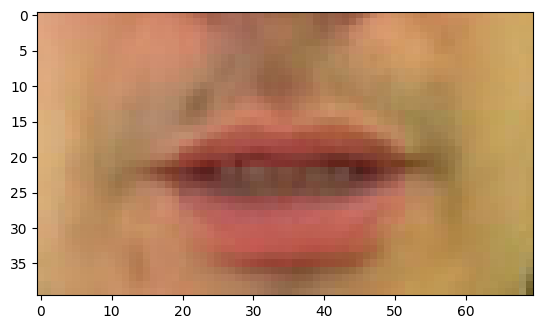

In [15]:
plt.imshow(frames[20])
plt.show()

In [10]:
frames[1].shape

(40, 70, 3)

In [16]:
mean = tf.math.reduce_mean(frames)
std = tf.math.reduce_std(tf.cast(frames, tf.float32))
norm = tf.cast((frames - mean), tf.float32) / std
print(norm)

tf.Tensor(
[[[[ 2.0361564   0.6560949  -0.15836772]
   [ 1.9909086   0.61084694 -0.20361565]
   [ 1.9004128   0.4072313  -0.3619834 ]
   ...
   [ 1.8777888   0.8823345  -0.6334709 ]
   [ 1.787293    0.9049585  -0.6560949 ]
   [ 1.764669    0.8823345  -0.67871886]]

  [[ 2.0135326   0.6334709  -0.1809917 ]
   [ 1.9682846   0.588223   -0.22623962]
   [ 1.9004128   0.4751032  -0.31673545]
   ...
   [ 1.787293    0.8597105  -0.67871886]
   [ 1.764669    0.8597105  -0.6334709 ]
   [ 1.742045    0.83708656 -0.6560949 ]]

  [[ 2.0135326   0.6334709  -0.1809917 ]
   [ 1.9682846   0.588223   -0.22623962]
   [ 1.9004128   0.4751032  -0.31673545]
   ...
   [ 1.787293    0.8597105  -0.67871886]
   [ 1.742045    0.83708656 -0.6560949 ]
   [ 1.742045    0.83708656 -0.6560949 ]]

  ...

  [[ 1.3574377   0.42985526 -0.6334709 ]
   [ 1.3800616   0.45247924 -0.61084694]
   [ 1.4026856   0.38460734 -0.6560949 ]
   ...
   [ 0.6560949   0.3619834  -1.0180782 ]
   [ 0.61084694  0.49772716 -0.42985526]
   [-

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


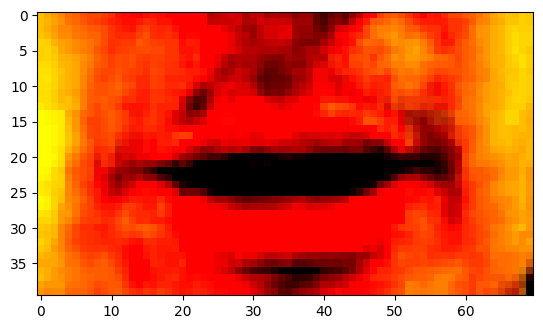

In [17]:
plt.imshow(norm[20])
plt.show()

In [13]:
norm[1].shape

TensorShape([40, 70, 3])